# Data Analysis - Lab 3
### M. Sébastien MASCHA & M. Sauvage Pierre
### ISEP Paris – September 24th, 2019
<br/>
<br/>

___
# Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:

- maths for sqrt, pi, exp
- Numpy to manipulate arrays
- pandas to import csv
- matplotlib to plot graphics
- seaborn to make your charts prettier (built on top of Matplotlib)
- sklearn : tools for data mining and data analysis
- mlxtend : tools for ploting PCA

In [2]:
# coding: utf-8

import data

from math import sqrt,pi,exp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

import sklearn
# Normalize data
from sklearn.preprocessing import StandardScaler
# Dimension reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
# Useful 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import mlxtend
from mlxtend.plotting import plot_pca_correlation_graph

<br/>
<br/>

___
# Exercice A - PCA and LDA on the Iris data
In this exercice, we study one of the most famous dataset : Fisher's Iris , in which different characteristics of iris flower are studied.
### Question 1 - Open the file

We use the comma separator because we saw in the text editor that the data was separated
by commas.

In [3]:
df = pd.read_csv("data/iris.csv", sep =';')
print(df.shape)

df.head()

(150, 5)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


 As we can see from  the command dataframe.head() & dataframe.shape(), our dataset contains attributes on 150 flowers :  their sepals length and width  and the same measure for their petals

### Question 2 - Associate each class to a color for display  purposes

In [4]:
def associateColorToClass(iris_class):
    switcher = {
                    'setosa': "r",
                    'virginica': "b",
                    'versicolor': "g"
                }

    return switcher.get(iris_class)

df['Color'] = df.apply(lambda x: associateColorToClass(x['Class']), axis=1)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,Color
0,5.1,3.5,1.4,0.2,setosa,r
1,4.9,3.0,1.4,0.2,setosa,r
2,4.7,3.2,1.3,0.2,setosa,r
3,4.6,3.1,1.5,0.2,setosa,r
4,5.0,3.6,1.4,0.2,setosa,r
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,b
146,6.3,2.5,5.0,1.9,virginica,b
147,6.5,3.0,5.2,2.0,virginica,b
148,6.2,3.4,5.4,2.3,virginica,b


### Question 3 - Center and reduce your data. You may do so using the package Standard- Scaler from sklearn, and the function of the same name.

Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

In [5]:
scaled_df = df.copy()

col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
features = StandardScaler().fit_transform(scaled_df[col_names].values)

scaled_df[col_names] = features
scaled_df_features = scaled_df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]

### Question 5 - Visualize the data in 2 dimensions using PCA. Comment.

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df_features)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [7]:
finalDf = pd.concat([principalDf, scaled_df[['Class']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Class
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


Use a PCA projection to 2d to visualize the entire data set.

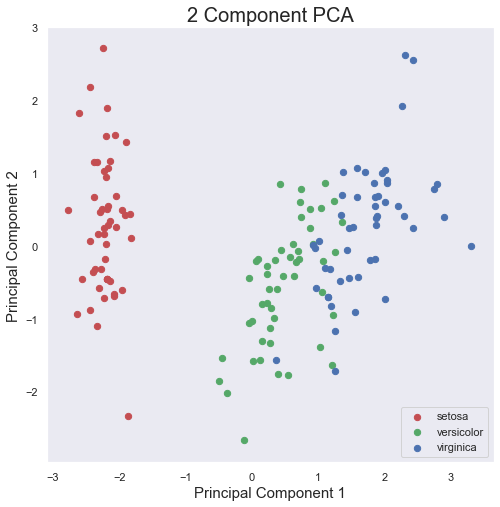

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = df.Class.unique()
colors = df.Color.unique()
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 40)
ax.legend(targets)
ax.grid()

The three classes appear to be well separated!

iris-virginica and iris-versicolor could be better separated, but still good!

The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

In [9]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset : 4,20%.

### Question 6 - Write a function to draw a correlation circle similar to the ones we saw in class for these data (you may use code from the internet). 

Based on the result, comment on the relations between the different attributes.

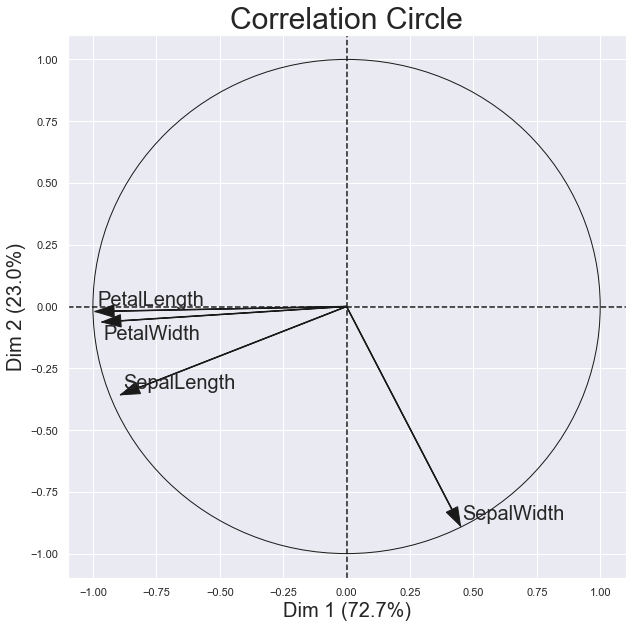

In [10]:
features =['SepalLength','SepalWidth','PetalLength','PetalWidth']

figure, correlation_matrix = plot_pca_correlation_graph(scaled_df_features, 
                                                        features,
                                                        figure_axis_size=10)


In [11]:
def circleOfCorrelations(pc_infos, ebouli):
    fig = plt.figure(figsize = (12,12))
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["PC-0"])):
        x = pc_infos["PC-0"][idx]
        y = pc_infos["PC-1"][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(pc_infos.index[idx], xy=(x,y))
    plt.xlabel("PC-0 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-1 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Circle of Correlations")  
    
def myPCA(df, clusters=None):
    # Normalize data
    df_norm = (df - df.mean()) / df.std()
    # PCA
    pca = PCA(n_components='mle')
    pca_res = pca.fit_transform(df_norm.values)
    # Ebouli
    ebouli = pd.Series(pca.explained_variance_ratio_)
    ebouli.plot(kind='bar', title="Ebouli des valeurs propres")
    plt.show()
    # Circle of correlations
    coef = np.transpose(pca.components_)
    cols = ['PC-'+str(x) for x in range(len(ebouli))]
    pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
    circleOfCorrelations(pc_infos, ebouli)
    plt.show()
    return pc_infos, ebouli

# myPCA(scaled_df_features)

### Question 7- Using the function train_test_split, split your dataset into to subset with the proportions 80/20. 

The dataset with 80% of the data will be your training set, and the other one your test set. Try to have a good class repartition on both subsets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( scaled_df_features, scaled_df['Class'], test_size=2/10.0, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


### Question 8- Using the LinearDiscriminantAnalysis library from sklearn, train and test an LDA model. 

Display the confusion matrices for both training and test sets. Compare your visual results with the ones from PCA. Comment.

*LDA can be used to perform supervised dimensionality reduction, by projecting the input data to a linear subspace consisting of the directions which maximize the separation between classes (in a precise sense discussed in the mathematics section below). The dimension of the output is necessarily less than the number of classes, so this is, in general, a rather strong dimensionality reduction, and only makes sense in a multiclass setting.*

In [18]:
# Implement LDA
lda = LDA(n_components = 2, solver='svd')
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# Train Logistic Regression with LDA
classifier_train = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier_train.fit(X_train, y_train)
classifier_test = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier_test.fit(X_test, y_test)

# Predict Results of Regression with LDA
y_test_pred = classifier_test.predict(X_test)
y_train_pred = classifier_train.predict(X_train)


# Confusion Matrix 3X3
cm1 = confusion_matrix(y_test, y_test_pred)
print("The Confusion matrix for testing is :")
print(cm1)

cm2 = confusion_matrix(y_train, y_train_pred)
print("The Confusion matrix fer training is :")
print(cm2)






def plot_confusion_matrix(cm, classes,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    from itertools import product
    fig = plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# plot_confusion_matrix(cm1, df['Class'].unique())
# plt.show()
# plot_confusion_matrix(cm2, df['Class'].unique())
# plt.show()


The Confusion matrix for testing is :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
The Confusion matrix fer training is :
[[40  0  0]
 [ 0 40  1]
 [ 0  1 38]]


### Question 9- Same question with the QDA algorithm from QuadraticDiscriminantAnalysis.


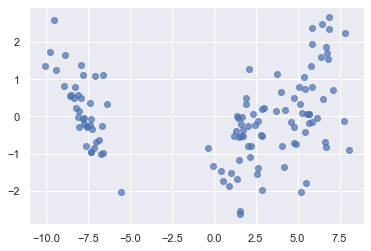

NameError: name 'test_data' is not defined

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis();
# On entraine l'algorithme de LDA
X_lda = lda.fit_transform(X_train, y_train);

# On affiche les données d'entrainement (les 80%) sur les deux axes
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    alpha=0.7,
    edgecolors='b'
)
plt.show();

# On prédit les résultats avec les 20% de tests
predic = lda.predict(test_data)

# On affiche la matrice de confusion
from sklearn.metrics import confusion_matrix
print("Matrice de confusion : \n", confusion_matrix(y_train,predic));